# Support Vector Regression (SVR)

In [10]:
#Importing the libraties:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [11]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [12]:
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2:3].values  

In [13]:
y = dataset.iloc[:,2:3].values   #Matrix
y.shape

(10, 1)

In [14]:
#As we have only 10 values of data, no need to split:
#Splitting the data into training set and test set:
#from sklearn.model_selection import train_test_split
#X_train, X_test , y_train, y_test =  train_test_split(X, y, test_size =0.2, random_state = 0)

In [15]:
#StandardScalar:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =sc_X.fit_transform(X)
sc_y = StandardScaler()
y =sc_y.fit_transform(y)

In [16]:
#Buildig the support vector model:
from sklearn.svm import SVR
s = SVR(kernel='rbf')
s.fit(X,y)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [17]:
y_pred = s.predict(sc_X.transform(np.array([[6.5]])))
y_pred # it is showing feature scalled values

array([-0.27861589])

In [18]:
y_pred = sc_y.inverse_transform(s.predict(sc_X.transform(np.array([[6.5]]))))
y_pred

array([170370.0204065])

# Final conclusion:

In [19]:
# At 6 year of experiance, actual salary is 150000
# At 7 year of experiance, actual salary is 200000

# Result:
#     Our SVR model has predicted salary at 6.5 years to be 170370

In [20]:
y_pred = s.predict(np.array([[3.5]]))
y_pred

array([0.03869048])

In [21]:
y_pred = sc_y.inverse_transform(s.predict(sc_X.transform(np.array([[2]]))))
y_pred

array([70786.94584626])

In [22]:
y_pred = sc_y.inverse_transform(s.predict(sc_X.transform(dataset.iloc[:,1:2].values)))
y_pred

array([ 73474.15615697,  70786.94584626,  88213.00902103, 108254.98574956,
       122574.52250599, 145503.10688572, 209410.23132923, 330606.89204569,
       471671.95587315, 557821.75899897])

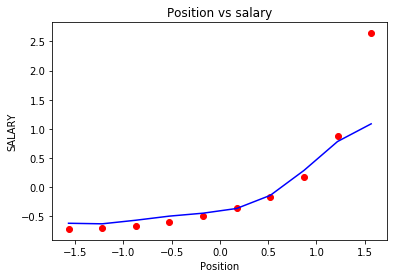

In [23]:
#Visualisation:
plt.scatter(X,y,color='red')
plt.plot(X,s.predict(X),color='blue')
plt.title("Position vs salary")
plt.xlabel('Position')
plt.ylabel('SALARY')
plt.show()

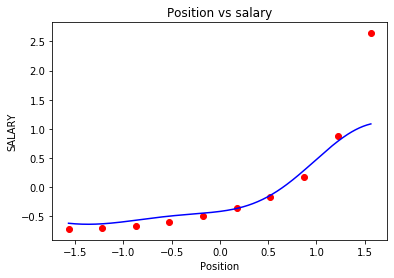

In [24]:
X_grid = np.arange(min(X),max(X),0.01)
X_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X,y,color='red')
plt.plot(X_grid,s.predict(X_grid),color='blue')
plt.title("Position vs salary")
plt.xlabel('Position')
plt.ylabel('SALARY')
plt.show()

In [25]:
regressor_ols = sm.OLS(y,X).fit()
regressor_ols.summary()

C:\Users\Dell\anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.669
Model:                            OLS   Adj. R-squared (uncentered):              0.632
Method:                 Least Squares   F-statistic:                              18.19
Date:                Fri, 22 Jan 2021   Prob (F-statistic):                     0.00209
Time:                        08:40:55   Log-Likelihood:                         -8.6606
No. Observations:                  10   AIC:                                      19.32
Df Residuals:                       9   BIC:                                      19.62
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.8179      0.192      4.265      0.002       0.384       1.252
==============================================================================
Omnibus:                        5.661   Durbin-Watson:                   0.786
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                2.297
Skew:                           1.148   Prob(JB):                        0.317
Kurtosis:                       3.492   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
regressor_ols = sm.OLS(dataset.iloc[:,2:3].values,y_pred).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.903
Method:                 Least Squares   F-statistic:                              93.75
Date:                Fri, 22 Jan 2021   Prob (F-statistic):                    4.68e-06
Time:                        08:41:32   Log-Likelihood:                         -130.44
No. Observations:                  10   AIC:                                      262.9
Df Residuals:                       9   BIC:                                      263.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.3160      0.136      9.683      0.000       1.009       1.623
==============================================================================
Omnibus:                       22.282   Durbin-Watson:                   1.237
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.702
Skew:                           2.232   Prob(JB):                     0.000642
Kurtosis:                       6.919   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""